# Lending club Case Study

# Problem Statement

By Using the given data, we are planning to address to below two patterns which helps the lending company for their better business.

1. Identify the potential defaulter before sanction the loan
2. Identify the better customer pattern

# Data Sourcing 

Load the Data

In [1]:
import os
#os.getcwd()
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import sklearn

import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.options.display.min_rows = 115

#pd.set_option('max_colwidth', 100)

#encoding_latin="latin"


loan_data=pd.read_csv('loan.csv');
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,

# Data Cleaning

# Understand columns and Data Types

In [2]:
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

columns data types are  int64, float64 and object. 
Total records = 39717

# Identifying columns which have all the values as null count = 39717

In [3]:
null_col_lst = []
null_col_lst = loan_data.columns[loan_data.isnull().sum()==39717].tolist()
null_col_lst


['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [4]:
len(null_col_lst)

54

# removing these null columns(54 columns)

In [5]:
loan_data.drop(columns = null_col_lst, axis=1, inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# Identifying null values count in remaining columns

In [6]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

# next_pymnt_d, mths_since_last_record, mths_since_last_delinq, desc finding the % of missing values, basically for big percentages

In [7]:
x_next_pymnt_d = (loan_data['next_pymnt_d'].isnull().sum()/len(loan_data['next_pymnt_d']))*100
x_mths_since_last_record = (loan_data['mths_since_last_record'].isnull().sum()/len(loan_data['mths_since_last_record']))*100
x_mths_since_last_delinq = (loan_data['mths_since_last_delinq'].isnull().sum()/len(loan_data['mths_since_last_delinq']))*100
x_desc = (loan_data['desc'].isnull().sum()/len(loan_data['desc']))*100

print(x_next_pymnt_d,x_mths_since_last_record,x_mths_since_last_delinq,x_desc)

97.12969257496789 92.98537150338646 64.66248709620565 32.58050708764509


# Removing those columns

In [8]:
loan_data.drop(columns = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1, inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
loan_data.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

# working on the missing values in columns

In [10]:
loan_data[['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   title                       39706 non-null  object 
 3   revol_util                  39667 non-null  object 
 4   last_pymnt_d                39646 non-null  object 
 5   last_credit_pull_d          39715 non-null  object 
 6   collections_12_mths_ex_med  39661 non-null  float64
 7   chargeoff_within_12_mths    39661 non-null  float64
 8   pub_rec_bankruptcies        39020 non-null  float64
 9   tax_liens                   39678 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.0+ MB


In [11]:
loan_data[['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']].isnull().sum()

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [12]:
#loan_data['emp_title'] = loan_data['emp_title'].fillna(loan_data['emp_title'].mode(), inplace=True)
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode(), inplace=True)
#loan_data['title'] = loan_data['title'].fillna(loan_data['title'].mode(), inplace=True)
loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].fillna(loan_data['last_pymnt_d'].mode(), inplace=True)
loan_data['last_credit_pull_d'] = loan_data['last_credit_pull_d'].fillna(loan_data['last_credit_pull_d'].mode(), inplace=True)
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].fillna(1, inplace=True)

In [13]:
loan_data[['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']].isnull().sum()

emp_title                      2459
emp_length                    39717
title                            11
revol_util                       50
last_pymnt_d                  39717
last_credit_pull_d            39717
collections_12_mths_ex_med    39717
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [14]:
loan_data[['emp_length','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med',
           'chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']].isnull().sum()

emp_length                    39717
revol_util                       50
last_pymnt_d                  39717
last_credit_pull_d            39717
collections_12_mths_ex_med    39717
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

# all are object type, so check for unique values, checking for categorical collections_12_mths_ex_med is numeric finding the nunique values in each column

In [15]:
loan_data[['emp_length','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med']].nunique()

emp_length                       0
revol_util                    1089
last_pymnt_d                     0
last_credit_pull_d               0
collections_12_mths_ex_med       0
dtype: int64

In [16]:
# finding the most occured value and '10+ years' is the frequent occuring value
loan_data['emp_length'].value_counts()

Series([], Name: emp_length, dtype: int64)

In [17]:
loan_data['emp_length'].mode()

Series([], Name: emp_length, dtype: object)

In [18]:
loan_data["emp_length"].fillna("10+ years", inplace = True)

In [19]:
print(loan_data['last_pymnt_d'].mode(), loan_data['last_credit_pull_d'].mode(), loan_data['collections_12_mths_ex_med'].mode())

Series([], Name: last_pymnt_d, dtype: object) Series([], Name: last_credit_pull_d, dtype: object) Series([], Name: collections_12_mths_ex_med, dtype: object)


In [20]:
# frequently occured value for this column is 'May-16'
loan_data['last_pymnt_d'].fillna('May-16', inplace=True)
loan_data['last_credit_pull_d'].fillna('May-16',inplace=True)
loan_data['collections_12_mths_ex_med'].fillna(0, inplace=True)
loan_data['chargeoff_within_12_mths'].fillna(0, inplace=True)

# working with revol_util column, converting it to float by removing the % char

# and imputing the null values with median

In [21]:
loan_data['revol_util'] = loan_data['revol_util'].str.replace("%","")
loan_data['revol_util'] = loan_data['revol_util'].astype(float)
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].median())

# pub_rec_bankruptcies values 0,1,2. This can be treated as categorical, apply mode

In [22]:
# x = loan_data['pub_rec_bankruptcies'].mode()
# loan_data["pub_rec_bankruptcies"].fillna(x)

loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].astype(float)
x = loan_data['pub_rec_bankruptcies'].median()
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(x)

# tax_liens imputing with 0

In [23]:
loan_data['tax_liens'].fillna(0, inplace=True)

In [24]:
loan_data[['emp_length','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']].isnull().sum()

emp_length                    0
revol_util                    0
last_pymnt_d                  0
last_credit_pull_d            0
collections_12_mths_ex_med    0
chargeoff_within_12_mths      0
pub_rec_bankruptcies          0
tax_liens                     0
dtype: int64

In [25]:
loan_data.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

# Univariant Analysis

# there are many numeric columns (currency and float). 
# let us figure out the outliers for currency columns 

loan_amnt,funded_amnt,funded_amnt_inv, installment, annual_inc, dti,out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp,total_rec_int,total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt

# 1. loan_amnt 

In [26]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# plot is more right skewed

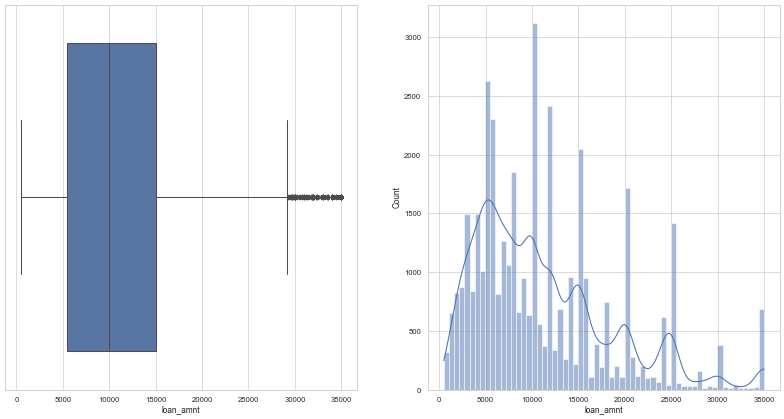

In [27]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['loan_amnt']);
sns.histplot(ax=axes[1], x=loan_data['loan_amnt'],kde=True);

# treating outliers
# From the plot considering values ranging from amount <29000 
# we treat the next values falling above this value

In [28]:
upper_limit = 29000
lower_limit = 0
loan_data['loan_amnt'] = np.where(loan_data['loan_amnt'] >= upper_limit, upper_limit, np.where(loan_data['loan_amnt'] <= lower_limit, lower_limit, loan_data['loan_amnt']))

In [29]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11093.962283
std       7102.695580
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

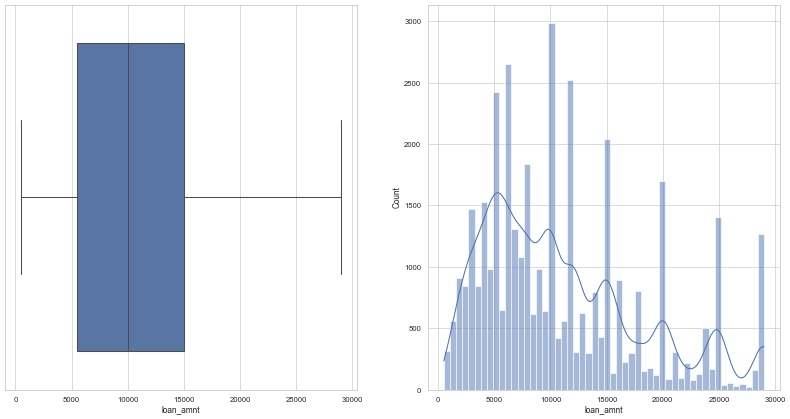

In [30]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['loan_amnt']);
sns.histplot(ax=axes[1], x=loan_data['loan_amnt'],kde=True);

# 2. funded_amnt

# we see here, above 75% value to max value are very far from the mean.
# and at 25% value of 5500 seems reasonable
# the amounts are more or less same as loan_amnt

In [31]:
loan_data['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

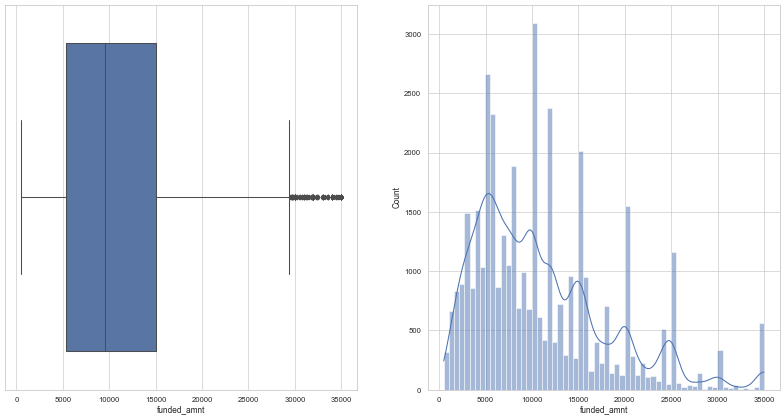

In [32]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['funded_amnt']);
sns.histplot(ax=axes[1], x=loan_data['funded_amnt'],kde=True);

# treating the outliers with those values greater than > 29000

In [33]:
upper_limit = 29000
lower_limit = 0
loan_data['funded_amnt'] = np.where(loan_data['funded_amnt'] >= upper_limit, upper_limit, np.where(loan_data['funded_amnt'] <= lower_limit, lower_limit, loan_data['funded_amnt']))

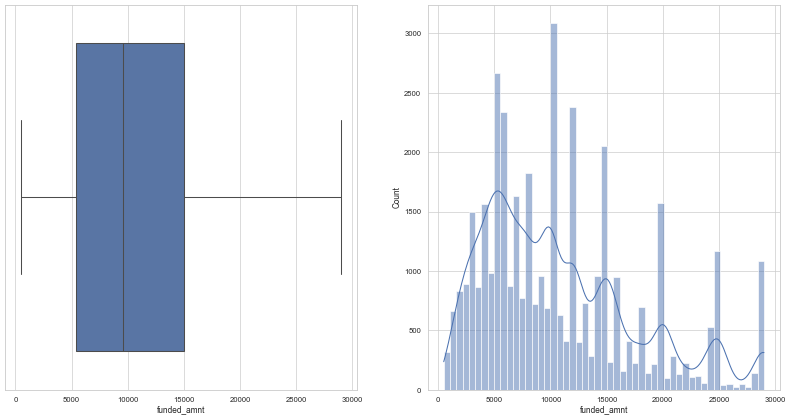

In [34]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['funded_amnt']);
sns.histplot(ax=axes[1], x=loan_data['funded_amnt'],kde=True);

# 3. funded_amnt_inv
# values of loan_amnt,funded_amnt,funded_amnt_inv are more or less same 
# very slight variation in the mean

In [35]:
loan_data['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

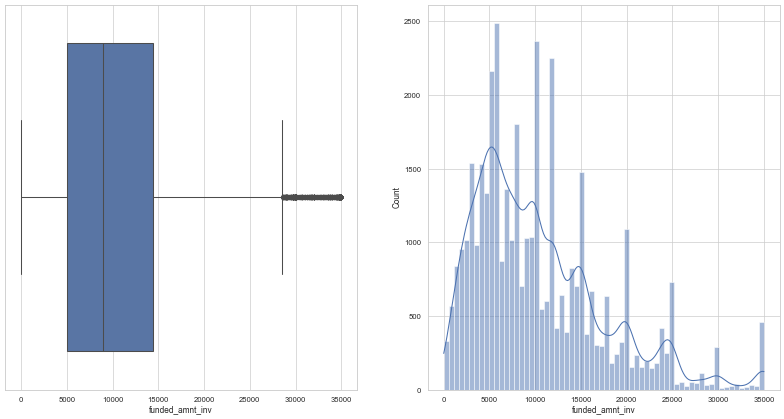

In [36]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['funded_amnt_inv']);
sns.histplot(ax=axes[1], x=loan_data['funded_amnt_inv'],kde=True);

# treating outliers

In [37]:
upper_limit = 28000
lower_limit = 0
loan_data['funded_amnt_inv'] = np.where(loan_data['funded_amnt_inv'] >= upper_limit, upper_limit, np.where(loan_data['funded_amnt_inv'] <= lower_limit, lower_limit, loan_data['funded_amnt_inv']))

In [38]:
loan_data['funded_amnt_inv'].describe()

count    39717.000000
mean     10281.043875
std       6784.017305
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      28000.000000
Name: funded_amnt_inv, dtype: float64

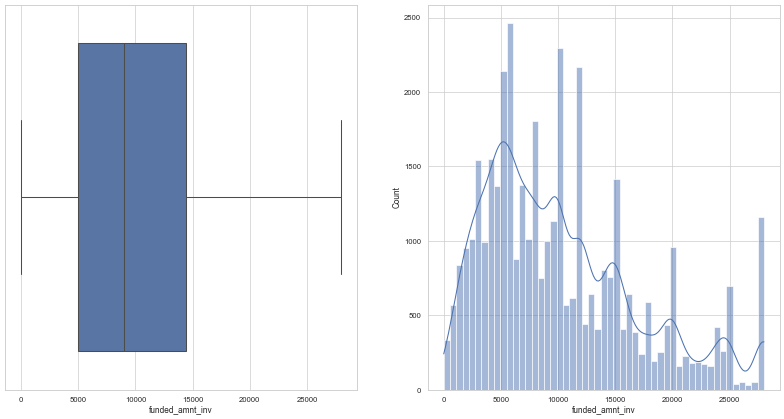

In [39]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['funded_amnt_inv']);
sns.histplot(ax=axes[1], x=loan_data['funded_amnt_inv'],kde=True);

# 4. installment
# data is very clear that above 75% data seems irrelevant as outliers
# above 75% shows values been very far from the mean

In [40]:
loan_data['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

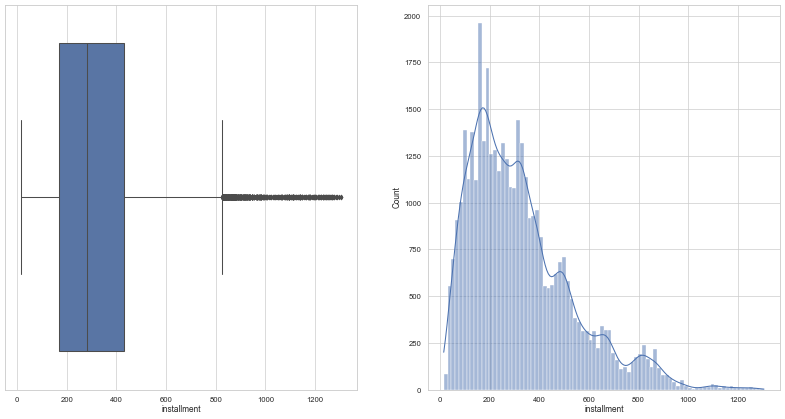

In [41]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['installment']);
sns.histplot(ax=axes[1], x=loan_data['installment'],kde=True);

# treating outliers

In [42]:
upper_limit = 800
lower_limit = 0
loan_data['installment'] = np.where(loan_data['installment'] >= upper_limit, upper_limit, np.where(loan_data['installment'] <= lower_limit, lower_limit, loan_data['installment']))

In [43]:
loan_data['installment'].describe()

count    39717.000000
mean       320.290648
std        196.488531
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max        800.000000
Name: installment, dtype: float64

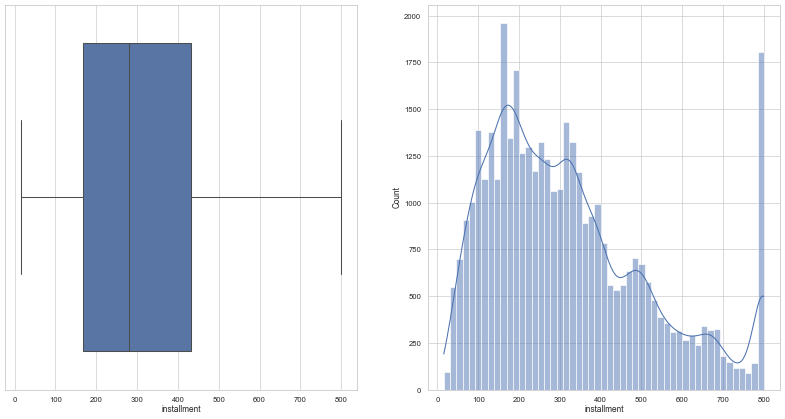

In [44]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['installment']);
sns.histplot(ax=axes[1], x=loan_data['installment'],kde=True);

# 5. annual_inc
# applied minmaxscaler(). after 0.6 we have outliers

In [45]:
scaler = MinMaxScaler()
loan_data[['annual_inc']] = scaler.fit_transform(loan_data[['annual_inc']])
loan_data['annual_inc'].describe()

count    39717.000000
mean         0.010835
std          0.010639
min          0.000000
25%          0.006071
50%          0.009173
75%          0.013059
max          1.000000
Name: annual_inc, dtype: float64

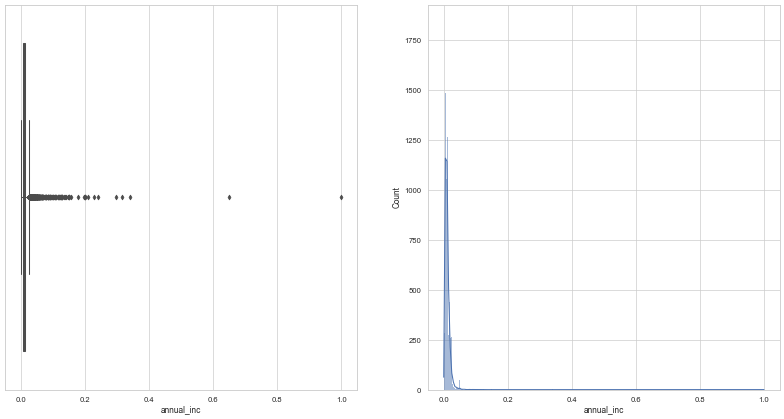

In [46]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['annual_inc']);
sns.histplot(ax=axes[1], x=loan_data['annual_inc'],kde=True);

# treating outliers

In [47]:
upper_limit = 0.023
lower_limit = 0.0
loan_data['annual_inc']= np.where(loan_data['annual_inc'] >= upper_limit, upper_limit, np.where(loan_data['annual_inc'] <= lower_limit, lower_limit, loan_data['annual_inc']))

In [48]:
loan_data['annual_inc'].describe()

count    39717.000000
mean         0.010188
std          0.005391
min          0.000000
25%          0.006071
50%          0.009173
75%          0.013059
max          0.023000
Name: annual_inc, dtype: float64

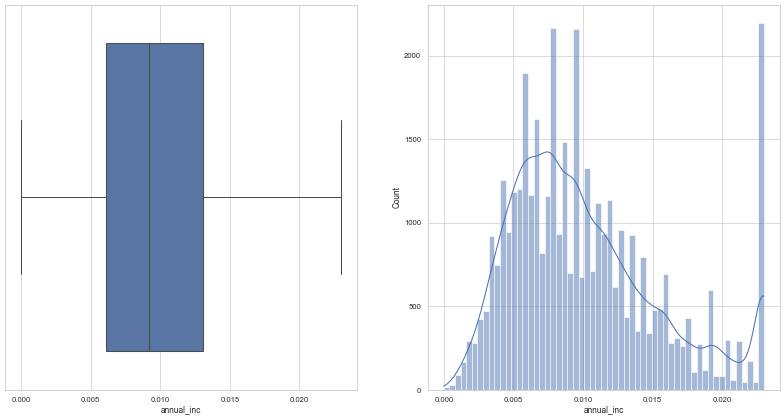

In [49]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['annual_inc']);
sns.histplot(ax=axes[1], x=loan_data['annual_inc'],kde=True);

# 6. dti
# no considerable outlier. the min and max values distance from mean seems okay

In [50]:
loan_data['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

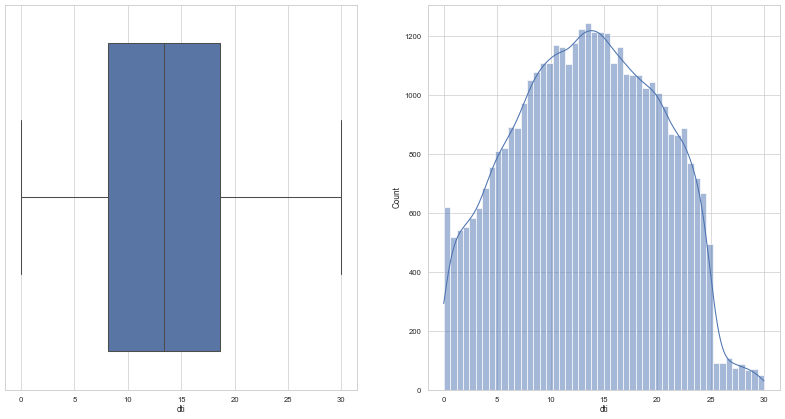

In [51]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['dti']);
sns.histplot(ax=axes[1], x=loan_data['dti'],kde=True);

# 7. out_prncp
# this column has more zeros and very few float values. what this column is?
# can this column be dropped?

In [52]:
loan_data['out_prncp'].value_counts()

0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
2000.47        1
241.36         1
581.29         1
992.48         1
1279.63        1
1070.96        1
1863.21        1
1666.39        1
1607.90        1
806.13         1
285.12         1
2398.86        1
1974.23        1
1070.63        1
1156.61        1
330.80         1
797.77         1
1053.64        1
1642.70        1
848.07         1
1096.03        1
2591.71        1
329.31         1
93.24          1
1296.03        1
           ...  
1887.07        1
2724.51        1
3394.88        1
3996.43        1
761.10         1
4977.37        1
2148.80        1
3801.78        1
1692.35        1
5355.29        1
3452.49        1
2565.29        1
1110.37        1
4605.08        1
2542.42        1
3686.62        1
4559.58        1
4594.05        1
2047.54        1
4447.51        1
3907.53        1
1731.34        1
3709.62        1
3176.85        1
3585.29        1
782.23         1
2296.41        1
1928.85       

In [53]:
loan_data['out_prncp'].describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

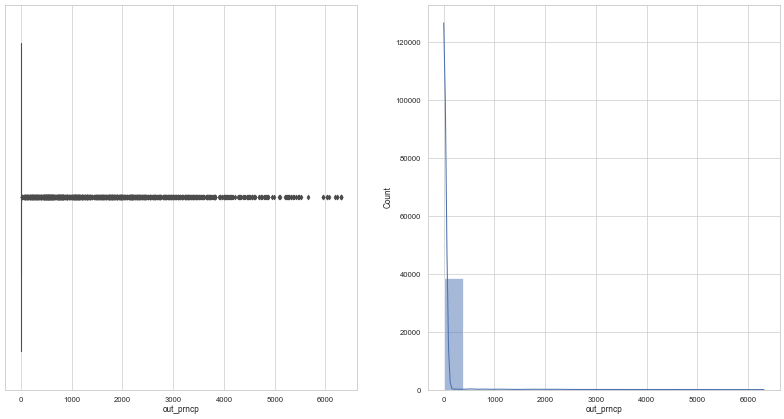

In [54]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['out_prncp']);
sns.histplot(ax=axes[1], x=loan_data['out_prncp'],kde=True);

# 8. out_prncp_inv
# data is similar to column out_prncp.
# can be dropped? because, very few values 

In [55]:
loan_data['out_prncp_inv'].describe()

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

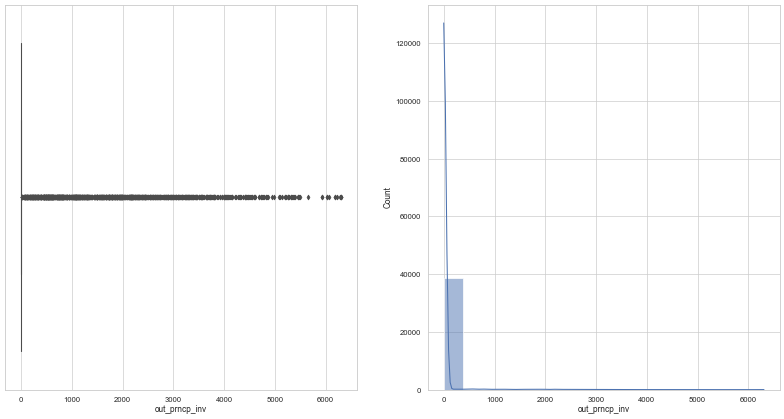

In [56]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['out_prncp_inv']);
sns.histplot(ax=axes[1], x=loan_data['out_prncp_inv'],kde=True);

# 9. total_pymnt
# we have outliers after 32000 and plot is more right skewed distribution
# and there are values with 0, we need remove them

In [57]:
loan_data['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

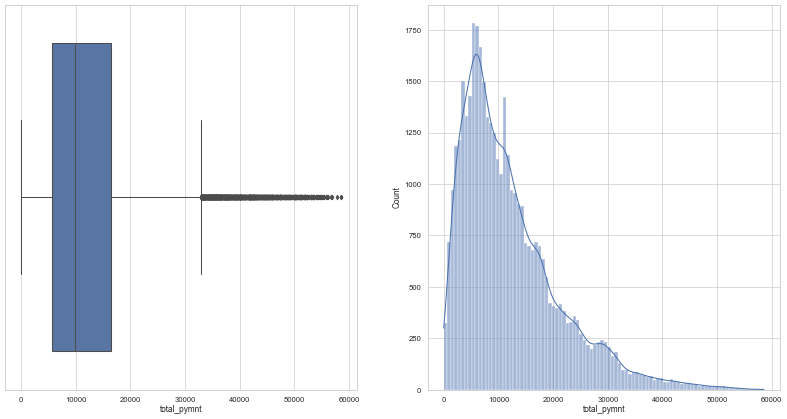

In [58]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_pymnt']);
sns.histplot(ax=axes[1], x=loan_data['total_pymnt'],kde=True);

# treating outliers

In [59]:
upper_limit = 32000
lower_limit = 0.0
loan_data['total_pymnt']= np.where(loan_data['total_pymnt'] >= upper_limit, upper_limit, np.where(loan_data['total_pymnt'] <= lower_limit, lower_limit, loan_data['total_pymnt']))

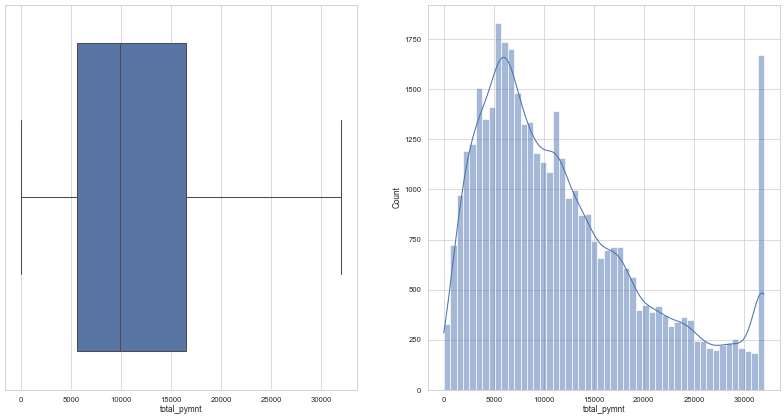

In [60]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_pymnt']);
sns.histplot(ax=axes[1], x=loan_data['total_pymnt'],kde=True);

# 10. total_pymnt_inv
# same data as total_pymnt
# we have outliers after about 35000 and plot is more right skewed distribution
# and there are values with 0, we need remove them

In [61]:
loan_data['total_pymnt_inv'].describe()

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

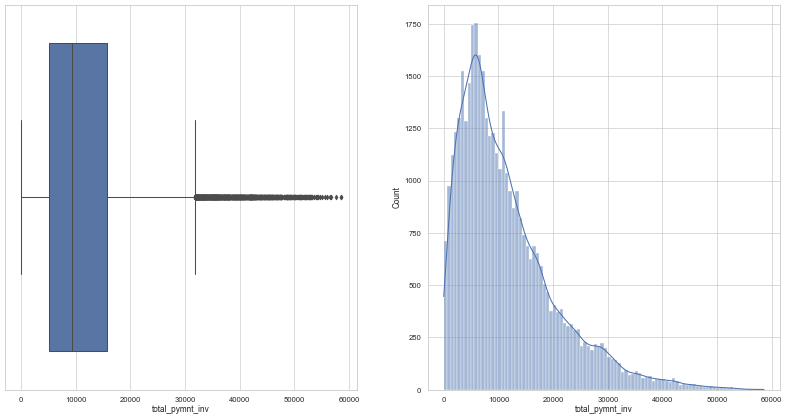

In [62]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_pymnt_inv']);
sns.histplot(ax=axes[1], x=loan_data['total_pymnt_inv'],kde=True);

# 11. total_rec_prncp
# right skewed. we can consider as per the norm having data between 25% - 75%
# rest can be treated as outliers and removed
# then median can be considered

In [63]:
loan_data['total_rec_prncp'].describe()

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64

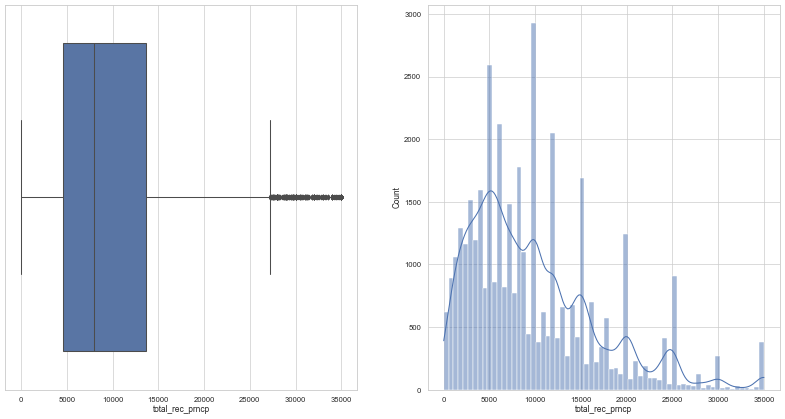

In [64]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_rec_prncp']);
sns.histplot(ax=axes[1], x=loan_data['total_rec_prncp'],kde=True);

# treating outliers

In [65]:
upper_limit = 27000
lower_limit = 0.0
loan_data['total_rec_prncp']= np.where(loan_data['total_rec_prncp'] >= upper_limit, upper_limit, np.where(loan_data['total_rec_prncp'] <= lower_limit, lower_limit, loan_data['total_rec_prncp']))

In [66]:
loan_data['total_rec_prncp'].describe()

count    39717.000000
mean      9674.993356
std       6713.428484
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      27000.000000
Name: total_rec_prncp, dtype: float64

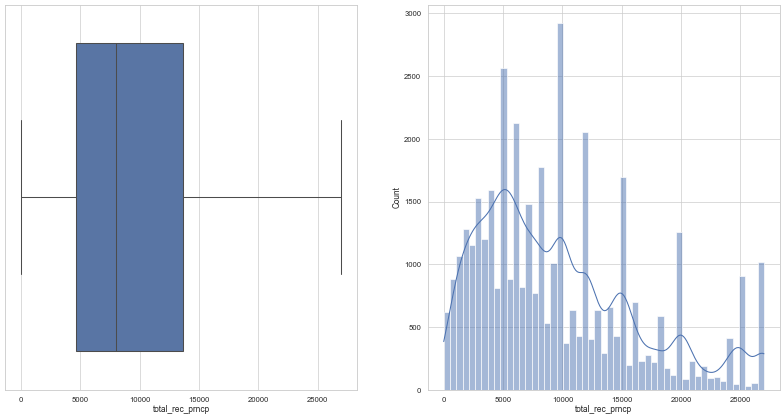

In [67]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_rec_prncp']);
sns.histplot(ax=axes[1], x=loan_data['total_rec_prncp'],kde=True);

# 12. total_rec_int, from the below plot, 
# the right dispersion of data lies between 1000 to 5000
# heavily skewed right

In [68]:
loan_data['total_rec_int'].describe()

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64

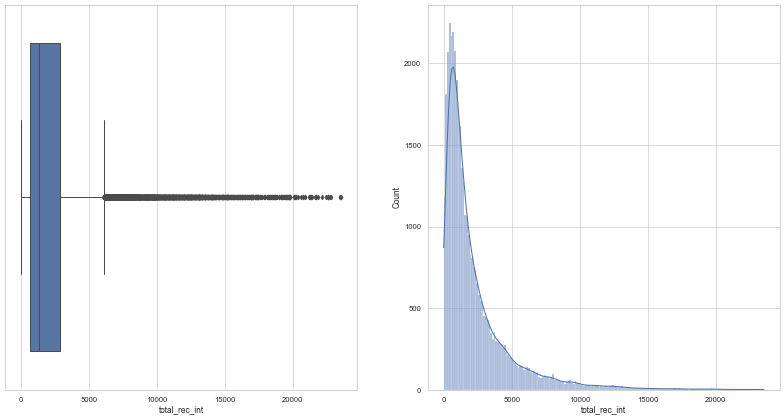

In [69]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_rec_int']);
sns.histplot(ax=axes[1], x=loan_data['total_rec_int'],kde=True);

# treating outliers

In [70]:
upper_limit = 6050
lower_limit = 0.0
loan_data['total_rec_int']= np.where(loan_data['total_rec_int'] >= upper_limit, upper_limit, np.where(loan_data['total_rec_int'] <= lower_limit, lower_limit, loan_data['total_rec_int']))

In [71]:
loan_data['total_rec_int'].describe()

count    39717.000000
mean      2006.075904
std       1781.374337
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max       6050.000000
Name: total_rec_int, dtype: float64

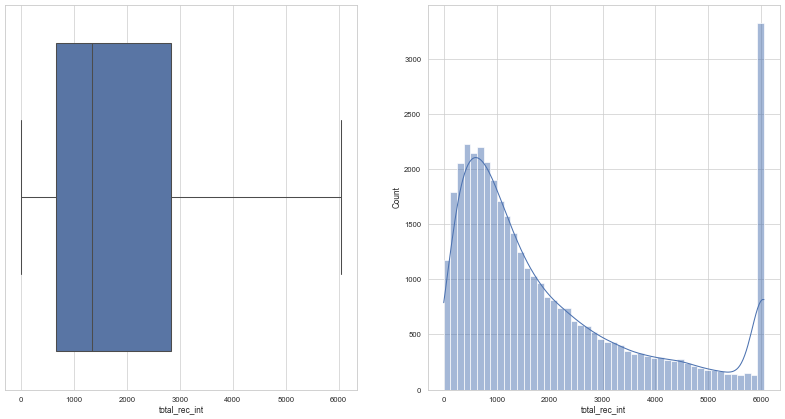

In [72]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_rec_int']);
sns.histplot(ax=axes[1], x=loan_data['total_rec_int'],kde=True);

# 13. total_rec_late_fee, very few values in this data. 
# Seems late fee amount and can be dropped.

In [73]:
loan_data['total_rec_late_fee'].describe()

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

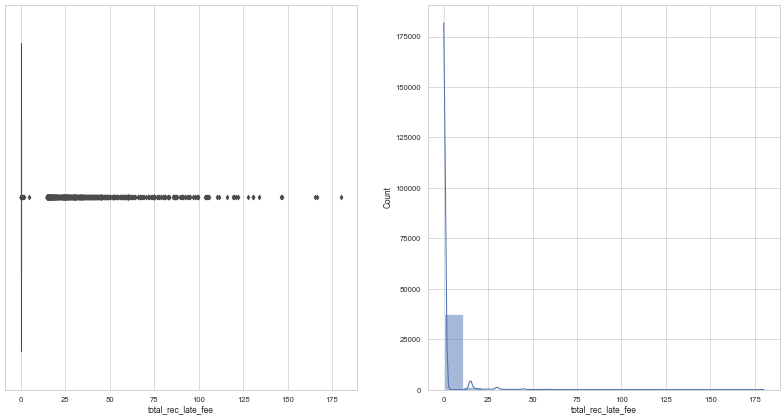

In [74]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['total_rec_late_fee']);
sns.histplot(ax=axes[1], x=loan_data['total_rec_late_fee'],kde=True);

# 14. recoveries very few values in this data. 
# can be dropped.

In [75]:
loan_data['recoveries'].describe()

count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

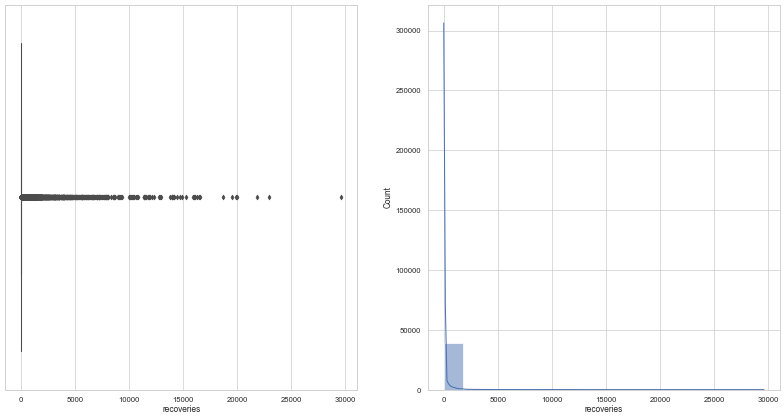

In [76]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['recoveries']);
sns.histplot(ax=axes[1], x=loan_data['recoveries'],kde=True);

# 15. collection_recovery_fee, very few values, can be dropped

In [77]:
loan_data['collection_recovery_fee'].describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

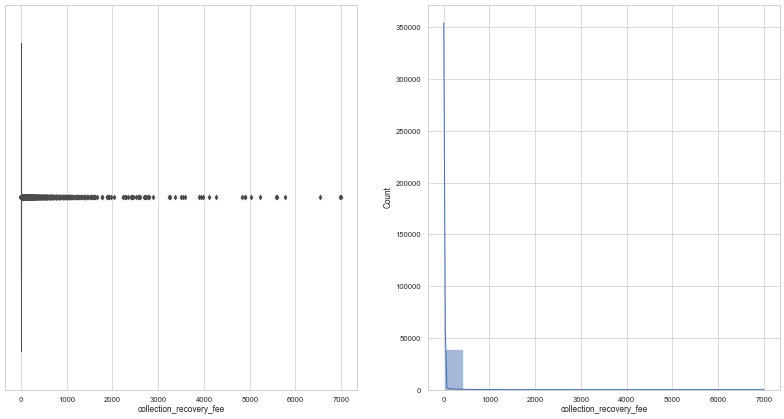

In [78]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['collection_recovery_fee']);
sns.histplot(ax=axes[1], x=loan_data['collection_recovery_fee'],kde=True);

# 16. last_pymnt_amnt, 
# too many values nearing to zero. too many outliers max values
# do not see any significance in this column, can be dropped


In [79]:
loan_data['last_pymnt_amnt'].describe()

count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

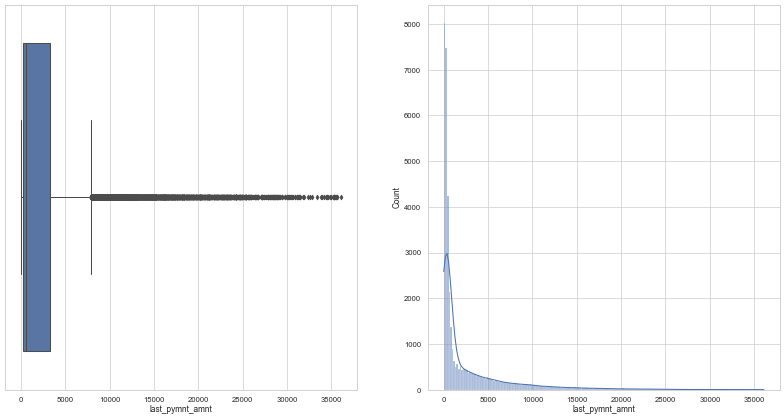

In [80]:
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=loan_data['last_pymnt_amnt']);
sns.histplot(ax=axes[1], x=loan_data['last_pymnt_amnt'],kde=True);

<Axes: >

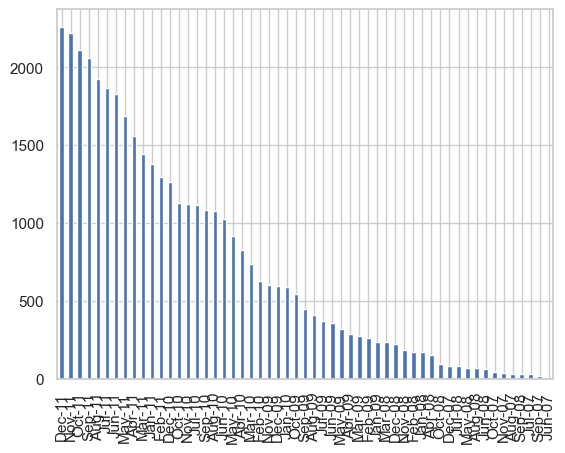

In [81]:
loan_data['issue_d'].value_counts().plot.bar()

In [82]:
char_off_data=loan_data[loan_data['loan_status']=='Charged Off']
char_off_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.627000e+03,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.0,5627.0,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000,5627.0,5627.0,5627.0,5627.0,5627.0,5627.000000,5627.0
mean,6.978440e+05,8.677521e+05,11914.750311,11595.108406,10693.024882,331.232147,0.009276,14.000624,0.170606,1.058113,9.178070,0.084770,13514.243647,55.554276,21.427581,0.0,0.0,6789.538146,6367.470474,3964.695239,1961.772374,4.291692,672.101872,87.565940,326.020833,0.0,1.0,0.0,0.0,0.0,0.065754,0.0
std,2.163767e+05,2.723270e+05,7609.247022,7339.733184,7193.180281,203.807532,0.005118,6.585577,0.534986,1.154136,4.525937,0.284873,15164.117475,27.867575,11.447427,0.0,0.0,6393.698654,6490.913020,3947.963146,1821.189175,12.815790,1720.742949,386.590605,528.983051,0.0,0.0,0.0,0.0,0.0,0.249304,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,22.790000,0.000013,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297245e+05,6.849050e+05,5600.000000,5575.000000,5000.000000,168.555000,0.005504,9.050000,0.000000,0.000000,6.000000,0.000000,3968.000000,34.400000,13.000000,0.0,0.0,2215.575000,1865.910000,1205.780000,555.010000,0.000000,0.000000,0.000000,112.885000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969370e+05,8.881580e+05,10000.000000,10000.000000,9401.209477,293.870000,0.008172,14.290000,0.000000,1.000000,8.000000,0.000000,9211.000000,58.200000,20.000000,0.0,0.0,4839.000000,4345.740000,2729.590000,1288.260000,0.000000,173.040000,2.513200,238.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548760e+05,1.066578e+06,16500.000000,16000.000000,15000.000000,457.840000,0.011841,19.290000,0.000000,2.000000,12.000000,0.000000,17518.000000,78.950000,28.000000,0.0,0.0,9191.705000,8544.850000,5341.130000,2801.615000,0.000000,595.655000,9.365000,405.705000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,29000.000000,29000.000000,28000.000000,800.000000,0.023000,29.850000,8.000000,8.000000,38.000000,2.000000,148829.000000,99.900000,74.000000,0.0,0.0,32000.000000,51671.580000,27000.000000,6050.000000,180.200000,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


<Axes: >

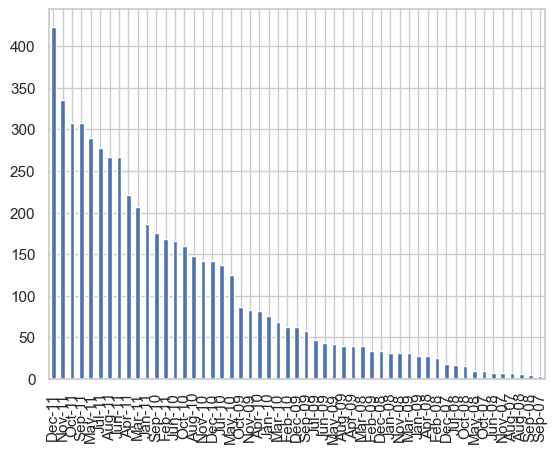

In [83]:
char_off_data['issue_d'].value_counts().plot.bar()

# Bi-variate Analysis

# working with categorical columns - with loan_status
# there are columns with one value across all the rows, ignoring such columns
# analysing them using bar-charts

# Listing important categorical columns - 
# term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status, addr_state

# 1. term, 36 month term period seems to be more preferred

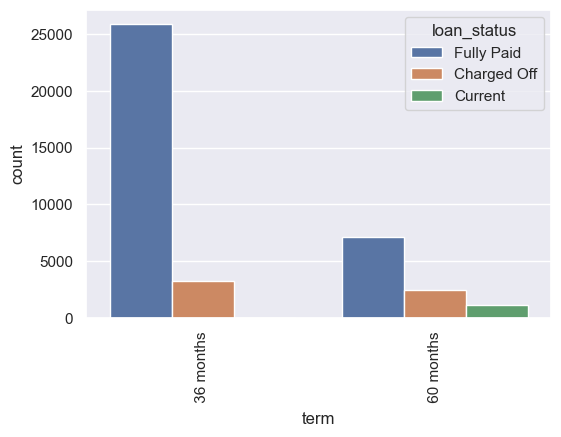

In [84]:
sns.set(font_scale=1)
plt.figure(figsize=[6,4])
ax=sns.countplot(x=loan_data['term'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 2. grade

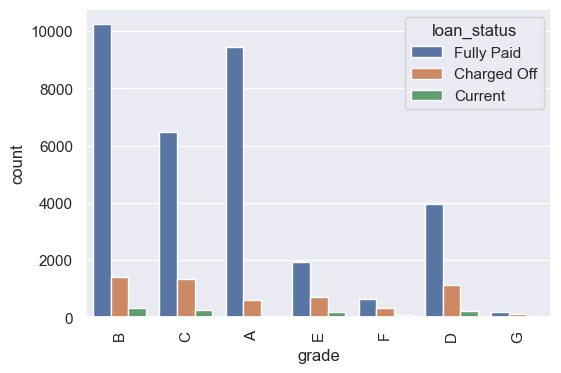

In [85]:
sns.set(font_scale=1)
plt.figure(figsize=[6,4])
ax=sns.countplot(x=loan_data['grade'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 3. sub_grade 

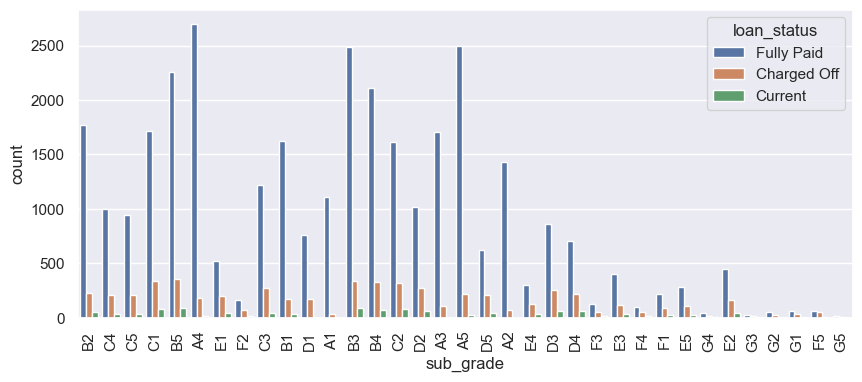

In [86]:
sns.set(font_scale=1)
plt.figure(figsize=[10,4])
ax=sns.countplot(x=loan_data['sub_grade'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 4. emp_length
# employees with 10+ years of employment are taking loans than others

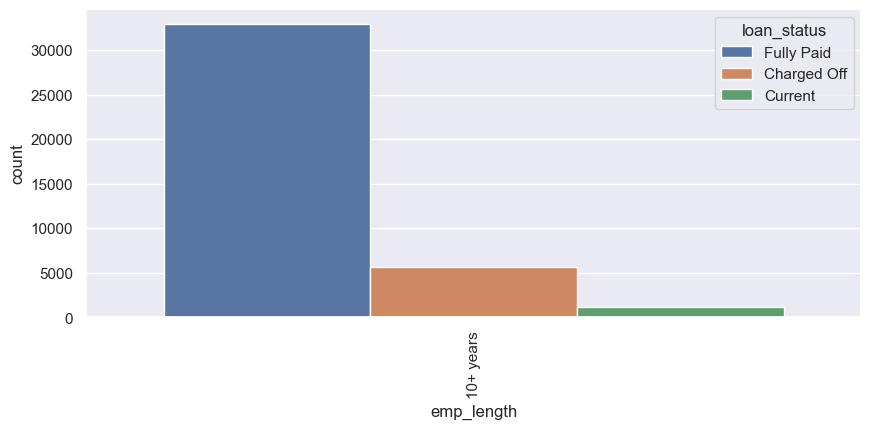

In [87]:
sns.set(font_scale=1)
plt.figure(figsize=[10,4])
ax=sns.countplot(x=loan_data['emp_length'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 5. home_ownership
# more for Rent. No considerable data for Own, Other

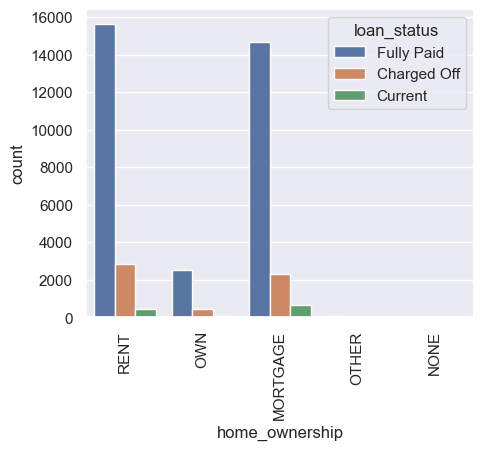

In [88]:
sns.set(font_scale=1)
plt.figure(figsize=[5,4])
ax=sns.countplot(x=loan_data['home_ownership'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 6. verification_status
# not verified applicants are more in number

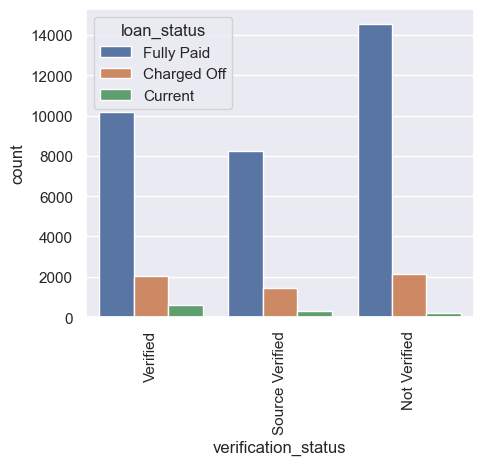

In [89]:
sns.set(font_scale=1)
plt.figure(figsize=[5,4])
ax=sns.countplot(x=loan_data['verification_status'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 7. loan_status
# count of fully paid loans are more than 80% in the file

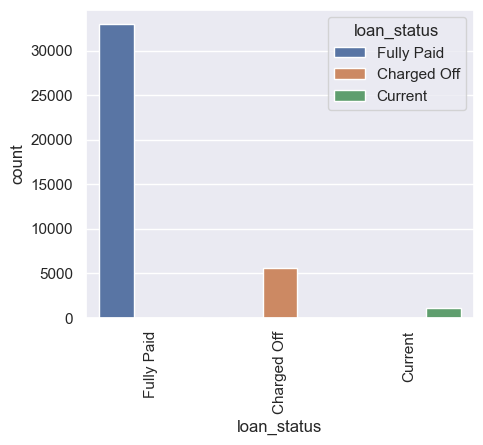

In [90]:
sns.set(font_scale=1)
plt.figure(figsize=[5,4])
ax=sns.countplot(x=loan_data['loan_status'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# 8. addr_state, 
# we can see CA,NY TX, FL are the states where loans given are more

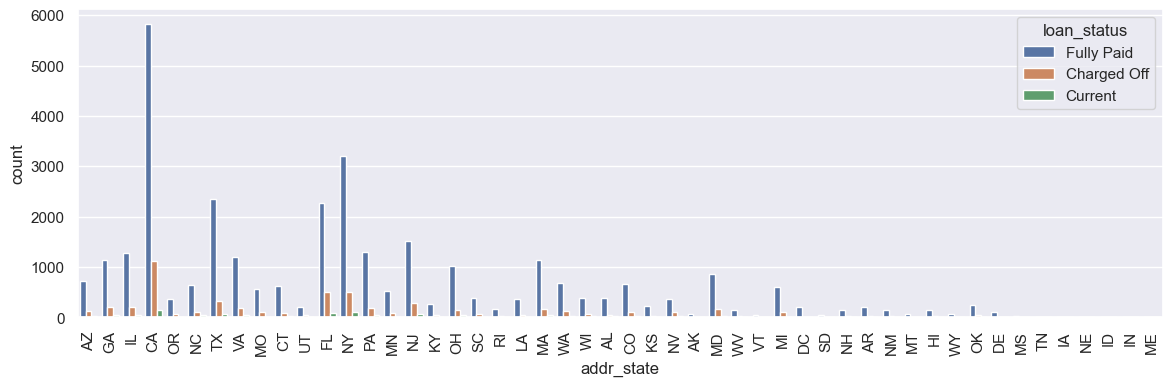

In [91]:
sns.set(font_scale=1)
plt.figure(figsize=[14,4])
ax=sns.countplot(x=loan_data['addr_state'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

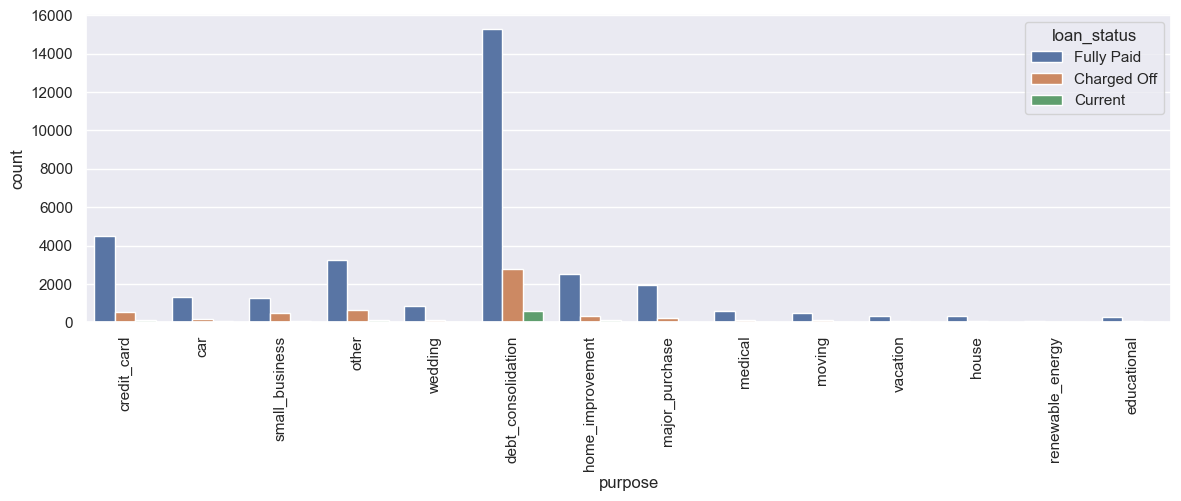

In [101]:

sns.set(font_scale=1)
plt.figure(figsize=[14,4])
ax=sns.countplot(x=loan_data['purpose'], data=loan_data, hue=loan_data['loan_status'])
plt.xticks(rotation=90)
plt.show()

# multivariate analysis using heatmap - correlation
# Basically for Numerical columns

In [99]:
loan_data_num_columns = loan_data[['loan_amnt','annual_inc', 'dti','total_pymnt', 'total_rec_prncp','total_rec_int']]

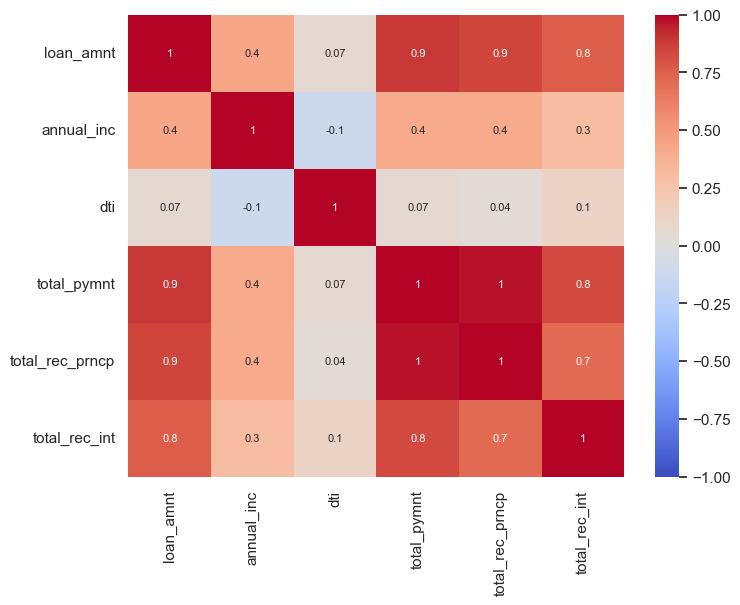

In [100]:
sns.set(rc={'figure.figsize': (8, 6)});
sns.heatmap(loan_data_num_columns.corr(), annot=True, center= 0, cmap= 'coolwarm', vmin=-1, vmax=1, annot_kws={'fontsize':8}, fmt='.1g');
#plt.show()

In [94]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39717.0,39717.0,39717.000000,39717.0
mean,6.831319e+05,8.504636e+05,11093.962283,10843.933328,10281.043875,320.290648,0.010188,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832741,22.088828,51.227887,50.989768,11886.015396,11567.149118,9674.993356,2006.075904,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.042501,0.0
std,2.106941e+05,2.656783e+05,7102.695580,6880.732614,6784.017305,196.488531,0.005391,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.314798,11.401709,375.172839,373.824457,8243.405434,8942.672613,6713.428484,1781.374337,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.202603,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,0.006071,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.500000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,0.009173,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,0.013059,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.300000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,29000.000000,29000.000000,28000.000000,800.000000,0.023000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,32000.000000,58563.680000,27000.000000,6050.000000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Conclusion

1) Most of loan has sanctioned with proper verifying the income
2) Most loans which sanctioned from May 2011 to Dec 2011 is "Charged Off"
3) Employee has 10 years of experience, taking more loan.
4) Most of loan charged off which term is 60month compared to 36 months
5) CA,NY TX, FL are the states where loans given are more